<a href="https://colab.research.google.com/github/Muzi-HS/2023ML/blob/main/%EC%A0%95%ED%98%84%EC%88%98(50%2C0.01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


한글 폰트

In [1]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y
!pip install koreanize-matplotlib


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
#matplotlib.font_manager._rebuild()


현재 위치 확인

In [3]:
import koreanize_matplotlib
!pwd

/content


데이터 셋 구성 함수

In [4]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import os
import shutil

directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
    './custom_dataset/val/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt, val_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir('/content/drive/MyDrive/image/' + query):
        if cnt < train_cnt:
            shutil.copyfile('/content/drive/MyDrive/image/'+ query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)

            print(f'[Train Dataset] {file_name}')

            for i in range(1,6):
                image_path = '/content/drive/MyDrive/image/'+ query + '/' + file_name
                image = cv2.imread(image_path)
                save_dir = './custom_dataset/train/' + query
                image_name = 'image' + str(cnt * train_cnt + i) + '.jpg'
                cv2.imwrite(os.path.join(save_dir, image_name), image)

        elif cnt < train_cnt + val_cnt:
            print(f'[Validation Dataset] {file_name}')
            shutil.copyfile('/content/drive/MyDrive/image/'+ query + '/' + file_name, './custom_dataset/val/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.copyfile('/content/drive/MyDrive/image/'+ query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    #shutil.rmtree(query)


데이터 셋 삭제

In [6]:
# 이미지 데이터셋 디렉토리 경로
dataset_directory = './custom_dataset'

# 데이터셋 삭제 함수
def delete_dataset():
    # 데이터셋 디렉토리 삭제
    shutil.rmtree(dataset_directory)

# 데이터셋 삭제 함수 호출
delete_dataset()

데이터셋 적용하기

In [7]:
# /content/drive/MyDrive/image

## 에스파 버전

query = '닝닝'
dataset_split(query, 20, 5)

query = '윈터'
dataset_split(query, 20, 5)

query = '지젤'
dataset_split(query, 20, 5)

query = '카리나'
dataset_split(query, 20, 5)



## 방탄 버전

# query = '방탄 진'
# dataset_split(query, 20, 5)

# query = '뷔'
# dataset_split(query, 20, 5)

# query = '슈가'
# dataset_split(query, 20, 5)

# query = '정국'
# dataset_split(query, 20, 5)

# query = 'RM'
# dataset_split(query, 20, 5)

# query = '제이홉'
# dataset_split(query, 20, 5)

# query = '지민'
# dataset_split(query, 20, 5)



[Train Dataset] NingNing_16.jpg
[Train Dataset] NingNing_6.jpg
[Train Dataset] NingNing_24.jpg
[Train Dataset] NingNing_12.jpg
[Train Dataset] NingNing_29.jpg
[Train Dataset] NingNing_19.jpg
[Train Dataset] NingNing_1.jpg
[Train Dataset] NingNing_21.jpg
[Train Dataset] NingNing_17.jpg
[Train Dataset] NingNing_30.jpg
[Train Dataset] NingNing_18.jpg
[Train Dataset] NingNing_14.jpg
[Train Dataset] NingNing_23.jpg
[Train Dataset] NingNing_7.jpg
[Train Dataset] NingNing_22.jpg
[Train Dataset] NingNing_8.jpg
[Train Dataset] NingNing_26.jpg
[Train Dataset] NingNing_15.jpg
[Train Dataset] NingNing_9.jpg
[Train Dataset] NingNing_27.jpg
[Validation Dataset] NingNing_11.jpg
[Validation Dataset] NingNing_5.jpg
[Validation Dataset] NingNing_2.jpg
[Validation Dataset] NingNing_25.jpg
[Validation Dataset] NingNing_10.jpg
[Test Dataset] NingNing_13.jpg
[Test Dataset] NingNing_3.jpg
[Test Dataset] NingNing_4.jpg
[Test Dataset] NingNing_28.jpg
[Test Dataset] NingNing_20.jpg
[Train Dataset] Winter_5.jpg


전이 학습을 위한 라이브러리 불러오기

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch import nn
import torchvision
from torchvision import datasets, models, transforms
import tensorflow as tf
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

데이터 셋 불러오기

In [9]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(degrees=30), # 무작위 회전 (최대 30도)
    transforms.RandomResizedCrop((224, 224), scale=(0.8, 1.2), ratio=(0.8, 1.2)), # 무작위 크롭 및 확대축소 (크기: 224x224, 크기 비율: 0.8 ~ 1.2)
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)), # 무작위 이동 및 확대축소
    transforms.RandomHorizontalFlip(), # 무작위 수평 뒤집기
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])
transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

In [11]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
val_datasets = datasets.ImageFolder(os.path.join(data_dir, 'val'), transforms)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
val_dataloader = torch.utils.data.DataLoader(val_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('val 데이터셋 크기:', len(val_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 480
val 데이터셋 크기: 20
테스트 데이터셋 크기: 20
클래스: ['닝닝', '윈터', '지젤', '카리나']


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


데이터 셋이 제대로 불러와졌는지 이미지 시각화

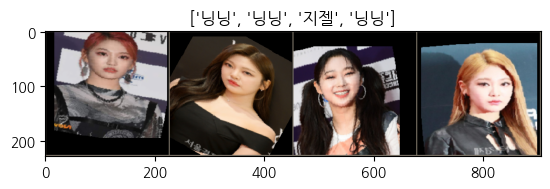

In [12]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

데이터 클래스 확인

In [13]:
print(train_datasets.classes)

['닝닝', '윈터', '지젤', '카리나']


training

In [15]:
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 60)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:06<00:00, 14.9MB/s]


In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def evaluate(model, criterion, dataloader, device):
    model.eval()
    running_loss = 0.
    running_corrects = 0
    y_true, y_pred = [], []
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        y_true += labels.cpu().numpy().tolist()
        y_pred += preds.cpu().numpy().tolist()

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects / len(dataloader.dataset) * 100.
    conf_mat = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=class_names)
    acc = accuracy_score(y_true, y_pred)

    print('Confusion Matrix:')
    print(conf_mat)
    print('Classification Report:')
    print(class_report)

    return epoch_loss, epoch_acc


In [17]:
from torch.optim.lr_scheduler import StepLR

# 학습률 스케줄러 정의
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

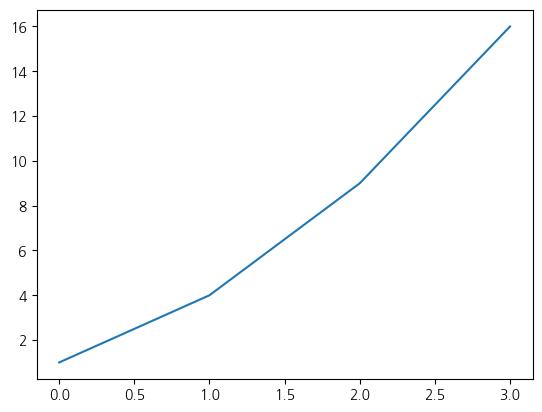

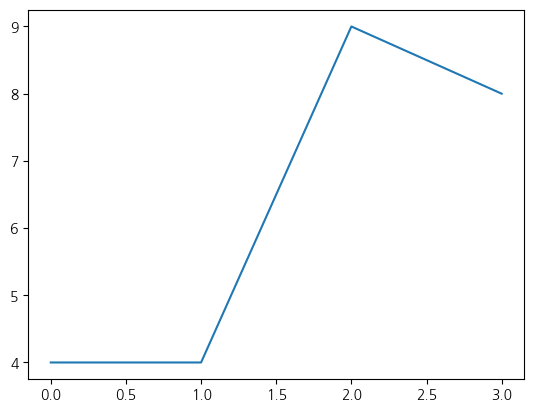

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(4), [1, 4, 9, 16])
plt.show()
plt.plot(range(4), [4, 4, 9, 8])
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 4 1 0]
 [2 0 2 1]
 [3 0 1 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.50      1.00      0.67         5
          윈터       1.00      0.80      0.89         5
          지젤       0.50      0.40      0.44         5
         카리나       0.50      0.20      0.29         5

    accuracy                           0.60        20
   macro avg       0.62      0.60      0.57        20
weighted avg       0.62      0.60      0.57        20

Validation Loss: 1.3170 Acc: 60.0000%
Training complete in 0m 21s
Best Validation Accuracy: 60.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[0 1 0 4]
 [0 5 0 0]
 [0 4 0 1]
 [0 3 0 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.00      0.00      0.00         5
          윈터       0.38      1.00      0.56         5
          지젤       0.00      0.00      0.00         5
         카리나       0.29      0.40      0.33         5

    accuracy                           0.35        20
   macro avg       0.17      0.35      0.22        20
weighted avg       0.17      0.35      0.22        20

Validation Loss: 1.4896 Acc: 35.0000%
Training complete in 0m 34s
Best Validation Accuracy: 60.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

Confusion Matrix:
[[4 1 0 0]
 [0 5 0 0]
 [0 5 0 0]
 [0 3 1 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      0.80      0.89         5
          윈터       0.36      1.00      0.53         5
          지젤       0.00      0.00      0.00         5
         카리나       1.00      0.20      0.33         5

    accuracy                           0.50        20
   macro avg       0.59      0.50      0.44        20
weighted avg       0.59      0.50      0.44        20

Validation Loss: 1.2219 Acc: 50.0000%
Training complete in 0m 47s
Best Validation Accuracy: 60.0000


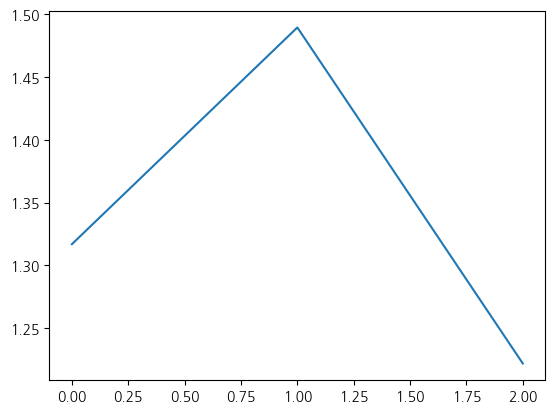

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [3 0 2 0]
 [2 0 3 0]
 [2 0 3 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.42      1.00      0.59         5
          윈터       0.00      0.00      0.00         5
          지젤       0.38      0.60      0.46         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.40        20
   macro avg       0.20      0.40      0.26        20
weighted avg       0.20      0.40      0.26        20

Validation Loss: 1.5131 Acc: 40.0000%
Training complete in 1m 1s
Best Validation Accuracy: 60.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


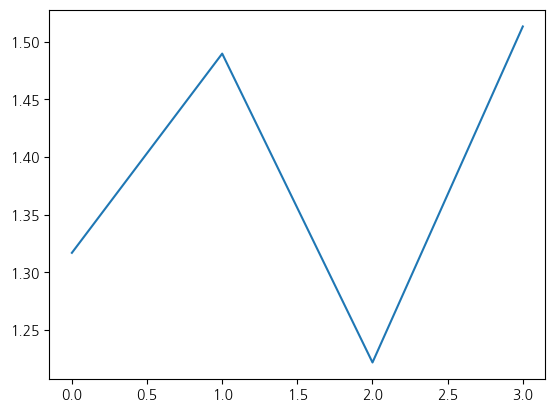

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[4 0 0 1]
 [0 4 0 1]
 [0 5 0 0]
 [0 4 0 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      0.80      0.89         5
          윈터       0.31      0.80      0.44         5
          지젤       0.00      0.00      0.00         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.45        20
   macro avg       0.41      0.45      0.40        20
weighted avg       0.41      0.45      0.40        20

Validation Loss: 1.2286 Acc: 45.0000%
Training complete in 1m 15s
Best Validation Accuracy: 60.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


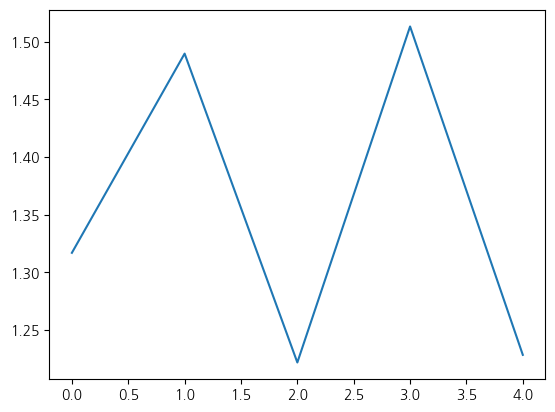

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[2 0 0 3]
 [0 1 0 4]
 [0 0 0 5]
 [0 0 0 5]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      0.40      0.57         5
          윈터       1.00      0.20      0.33         5
          지젤       0.00      0.00      0.00         5
         카리나       0.29      1.00      0.45         5

    accuracy                           0.40        20
   macro avg       0.57      0.40      0.34        20
weighted avg       0.57      0.40      0.34        20

Validation Loss: 1.4105 Acc: 40.0000%
Training complete in 1m 29s
Best Validation Accuracy: 60.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


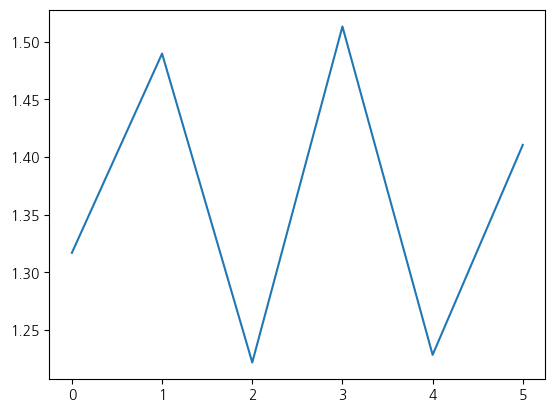

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[4 1 0 0]
 [0 5 0 0]
 [0 5 0 0]
 [0 4 0 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      0.80      0.89         5
          윈터       0.33      1.00      0.50         5
          지젤       0.00      0.00      0.00         5
         카리나       1.00      0.20      0.33         5

    accuracy                           0.50        20
   macro avg       0.58      0.50      0.43        20
weighted avg       0.58      0.50      0.43        20

Validation Loss: 2.0523 Acc: 50.0000%
Training complete in 1m 42s
Best Validation Accuracy: 60.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


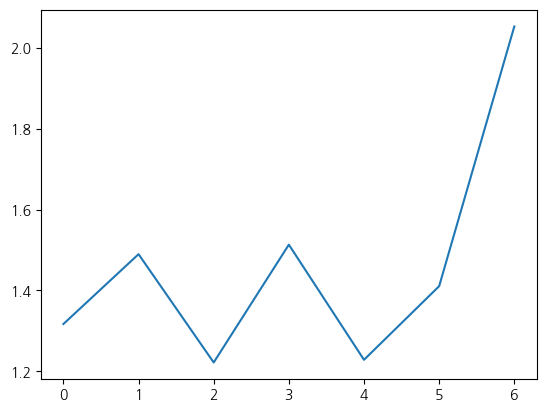

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[0 0 2 3]
 [0 0 2 3]
 [0 0 0 5]
 [0 0 1 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.00      0.00      0.00         5
          윈터       0.00      0.00      0.00         5
          지젤       0.00      0.00      0.00         5
         카리나       0.27      0.80      0.40         5

    accuracy                           0.20        20
   macro avg       0.07      0.20      0.10        20
weighted avg       0.07      0.20      0.10        20

Validation Loss: 1.7715 Acc: 20.0000%
Training complete in 1m 56s
Best Validation Accuracy: 60.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


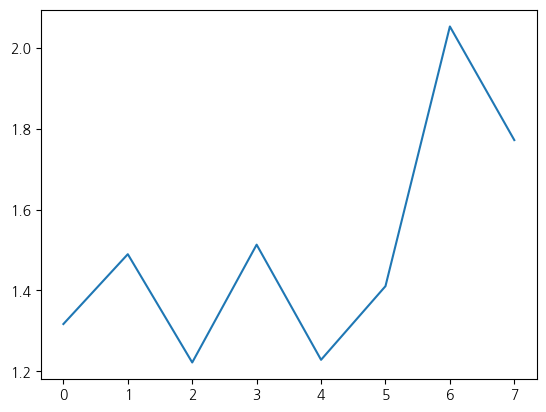

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[0 4 1 0]
 [0 3 2 0]
 [0 5 0 0]
 [0 4 1 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.00      0.00      0.00         5
          윈터       0.19      0.60      0.29         5
          지젤       0.00      0.00      0.00         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.15        20
   macro avg       0.05      0.15      0.07        20
weighted avg       0.05      0.15      0.07        20

Validation Loss: 1.5865 Acc: 15.0000%
Training complete in 2m 9s
Best Validation Accuracy: 60.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


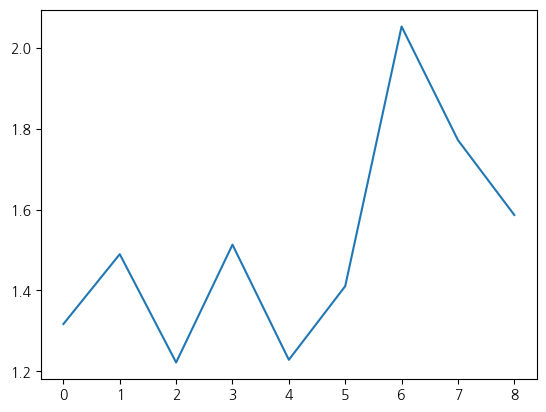

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[0 0 0 5]
 [0 0 0 5]
 [0 0 0 5]
 [0 0 0 5]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.00      0.00      0.00         5
          윈터       0.00      0.00      0.00         5
          지젤       0.00      0.00      0.00         5
         카리나       0.25      1.00      0.40         5

    accuracy                           0.25        20
   macro avg       0.06      0.25      0.10        20
weighted avg       0.06      0.25      0.10        20

Validation Loss: 1.4216 Acc: 25.0000%
Training complete in 2m 23s
Best Validation Accuracy: 60.0000


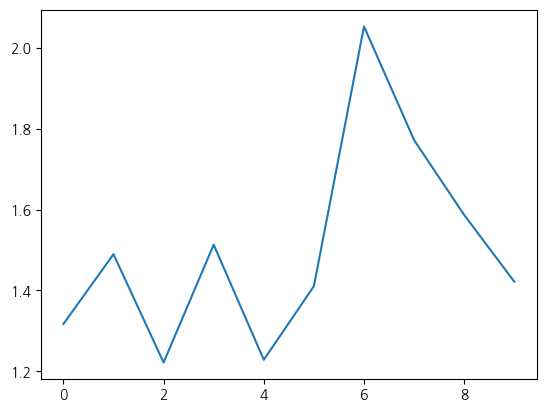

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 4 0 1]
 [0 1 3 1]
 [0 1 1 3]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.67      0.80      0.73         5
          지젤       0.75      0.60      0.67         5
         카리나       0.60      0.60      0.60         5

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20

Validation Loss: 0.8027 Acc: 75.0000%
Training complete in 2m 35s
Best Validation Accuracy: 75.0000


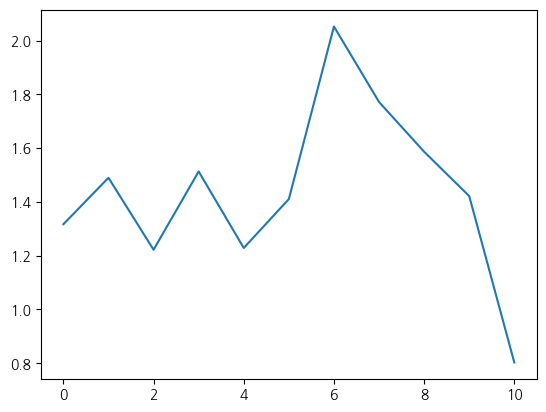

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [1 1 1 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.83      1.00      0.91         5
          윈터       0.83      1.00      0.91         5
          지젤       0.80      0.80      0.80         5
         카리나       0.67      0.40      0.50         5

    accuracy                           0.80        20
   macro avg       0.78      0.80      0.78        20
weighted avg       0.78      0.80      0.78        20

Validation Loss: 0.9994 Acc: 80.0000%
Training complete in 2m 48s
Best Validation Accuracy: 80.0000


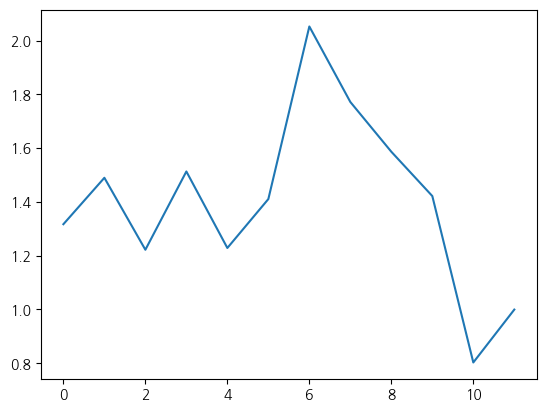

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [1 0 3 1]
 [2 1 1 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.62      1.00      0.77         5
          윈터       0.83      1.00      0.91         5
          지젤       0.75      0.60      0.67         5
         카리나       0.50      0.20      0.29         5

    accuracy                           0.70        20
   macro avg       0.68      0.70      0.66        20
weighted avg       0.68      0.70      0.66        20

Validation Loss: 1.2215 Acc: 70.0000%
Training complete in 3m 1s
Best Validation Accuracy: 80.0000


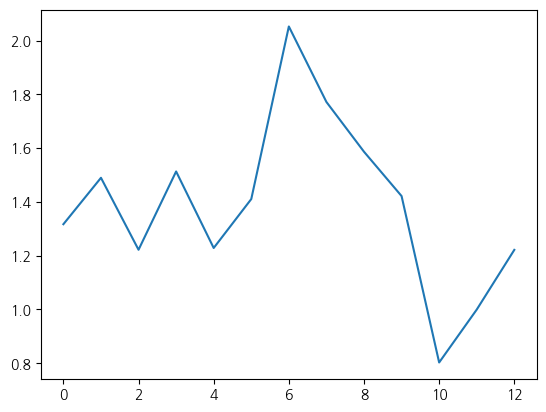

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 4 1 0]
 [1 0 3 1]
 [2 1 1 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.62      1.00      0.77         5
          윈터       0.80      0.80      0.80         5
          지젤       0.60      0.60      0.60         5
         카리나       0.50      0.20      0.29         5

    accuracy                           0.65        20
   macro avg       0.63      0.65      0.61        20
weighted avg       0.63      0.65      0.61        20

Validation Loss: 0.9775 Acc: 65.0000%
Training complete in 3m 15s
Best Validation Accuracy: 80.0000


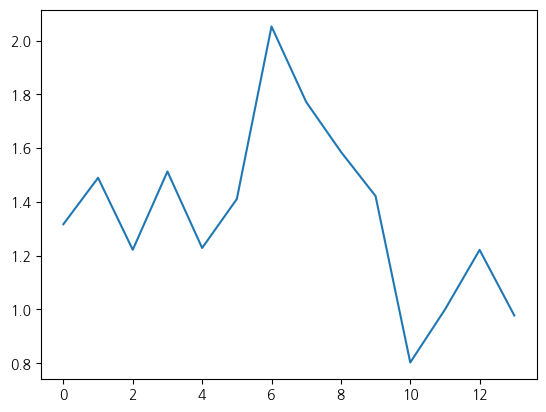

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [1 0 3 1]
 [1 1 1 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.71      1.00      0.83         5
          윈터       0.83      1.00      0.91         5
          지젤       0.75      0.60      0.67         5
         카리나       0.67      0.40      0.50         5

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.73        20
weighted avg       0.74      0.75      0.73        20

Validation Loss: 0.8466 Acc: 75.0000%
Training complete in 3m 29s
Best Validation Accuracy: 80.0000


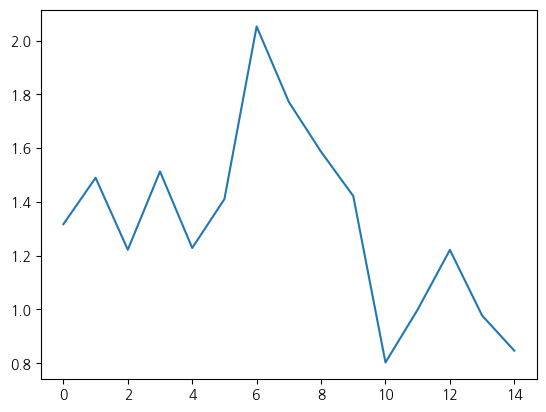

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [1 1 1 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.83      1.00      0.91         5
          윈터       0.83      1.00      0.91         5
          지젤       0.80      0.80      0.80         5
         카리나       0.67      0.40      0.50         5

    accuracy                           0.80        20
   macro avg       0.78      0.80      0.78        20
weighted avg       0.78      0.80      0.78        20

Validation Loss: 1.0747 Acc: 80.0000%
Training complete in 3m 43s
Best Validation Accuracy: 80.0000


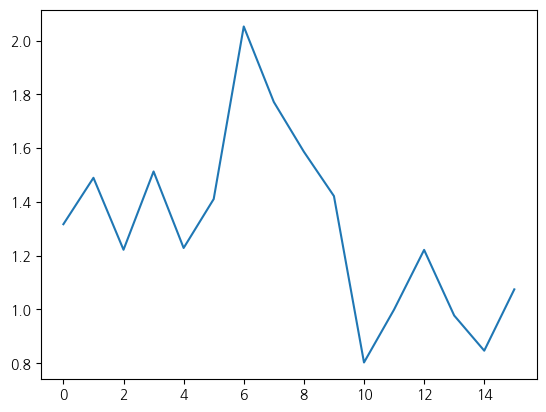

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [1 0 3 1]
 [2 1 1 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.62      1.00      0.77         5
          윈터       0.83      1.00      0.91         5
          지젤       0.75      0.60      0.67         5
         카리나       0.50      0.20      0.29         5

    accuracy                           0.70        20
   macro avg       0.68      0.70      0.66        20
weighted avg       0.68      0.70      0.66        20

Validation Loss: 1.1373 Acc: 70.0000%
Training complete in 3m 56s
Best Validation Accuracy: 80.0000


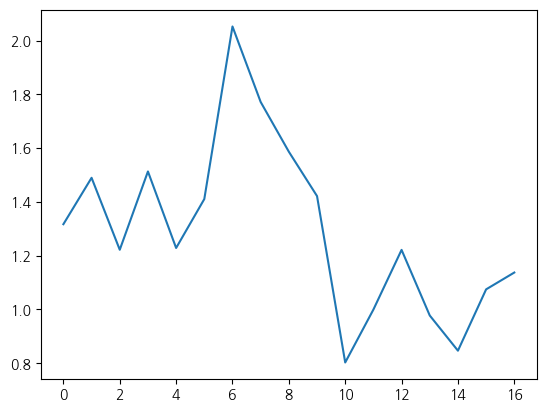

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[4 0 0 1]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      0.80      0.89         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.67      0.80      0.73         5

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

Validation Loss: 0.7884 Acc: 85.0000%
Training complete in 4m 10s
Best Validation Accuracy: 85.0000


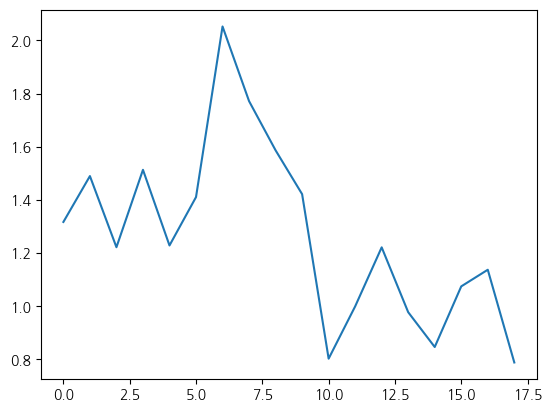

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 4 1 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.80      0.80      0.80         5
          지젤       0.80      0.80      0.80         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

Validation Loss: 0.8834 Acc: 85.0000%
Training complete in 4m 23s
Best Validation Accuracy: 85.0000


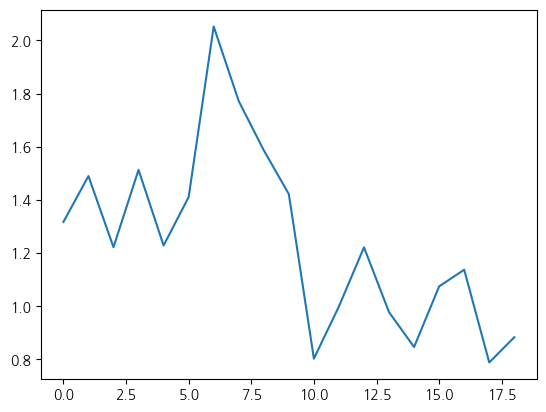

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 3 2 0]
 [0 0 4 1]
 [0 0 2 3]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       1.00      0.60      0.75         5
          지젤       0.50      0.80      0.62         5
         카리나       0.75      0.60      0.67         5

    accuracy                           0.75        20
   macro avg       0.81      0.75      0.76        20
weighted avg       0.81      0.75      0.76        20

Validation Loss: 0.6192 Acc: 75.0000%
Training complete in 4m 37s
Best Validation Accuracy: 85.0000


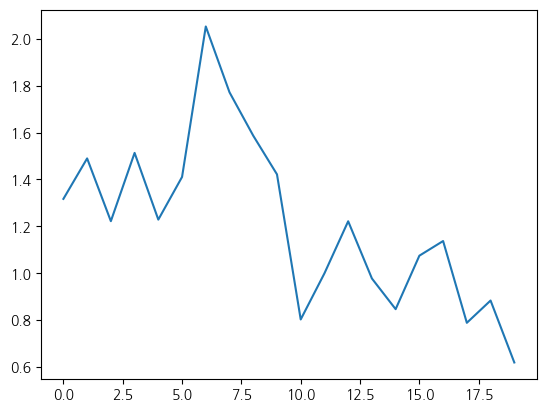

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 1 3]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       0.80      0.80      0.80         5
         카리나       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.84        20
weighted avg       0.85      0.85      0.84        20

Validation Loss: 0.7541 Acc: 85.0000%
Training complete in 4m 51s
Best Validation Accuracy: 85.0000


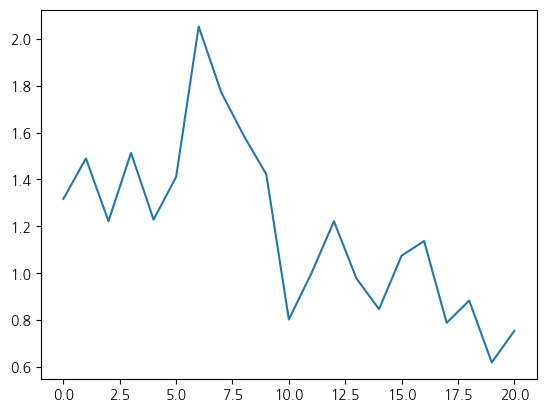

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 1 3]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       0.80      0.80      0.80         5
         카리나       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.84        20
weighted avg       0.85      0.85      0.84        20

Validation Loss: 0.7476 Acc: 85.0000%
Training complete in 5m 4s
Best Validation Accuracy: 85.0000


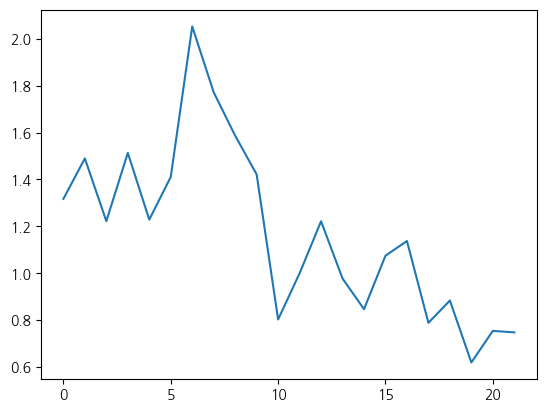

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 1 3]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       0.80      0.80      0.80         5
         카리나       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.84        20
weighted avg       0.85      0.85      0.84        20

Validation Loss: 0.7634 Acc: 85.0000%
Training complete in 5m 17s
Best Validation Accuracy: 85.0000


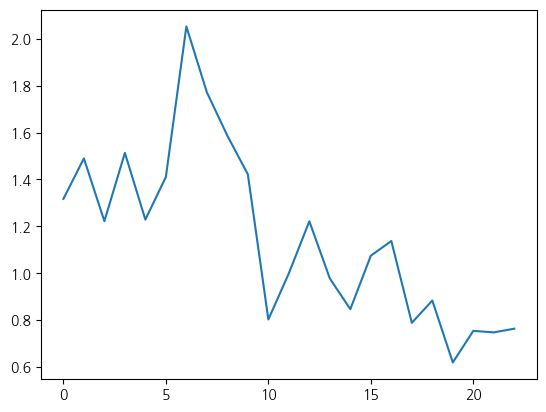

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 1 3]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       0.80      0.80      0.80         5
         카리나       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.84        20
weighted avg       0.85      0.85      0.84        20

Validation Loss: 0.7859 Acc: 85.0000%
Training complete in 5m 30s
Best Validation Accuracy: 85.0000


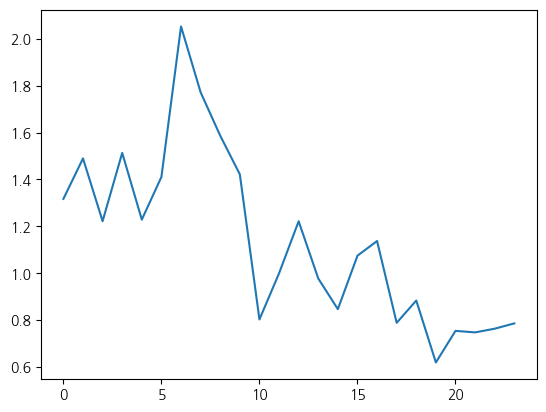

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 1 3]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       0.80      0.80      0.80         5
         카리나       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.84        20
weighted avg       0.85      0.85      0.84        20

Validation Loss: 0.7442 Acc: 85.0000%
Training complete in 5m 43s
Best Validation Accuracy: 85.0000


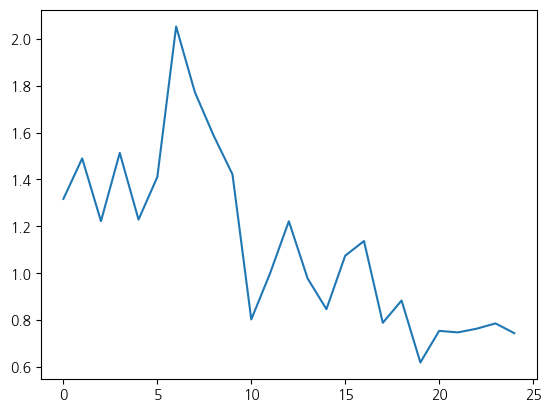

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 1 3]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       0.80      0.80      0.80         5
         카리나       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.84        20
weighted avg       0.85      0.85      0.84        20

Validation Loss: 0.7556 Acc: 85.0000%
Training complete in 5m 57s
Best Validation Accuracy: 85.0000


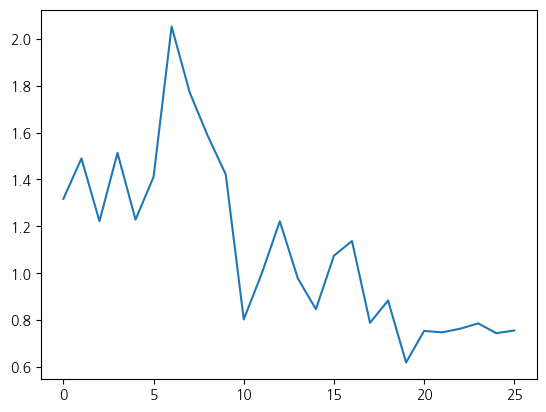

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 1 3]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       0.80      0.80      0.80         5
         카리나       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.84        20
weighted avg       0.85      0.85      0.84        20

Validation Loss: 0.7423 Acc: 85.0000%
Training complete in 6m 10s
Best Validation Accuracy: 85.0000


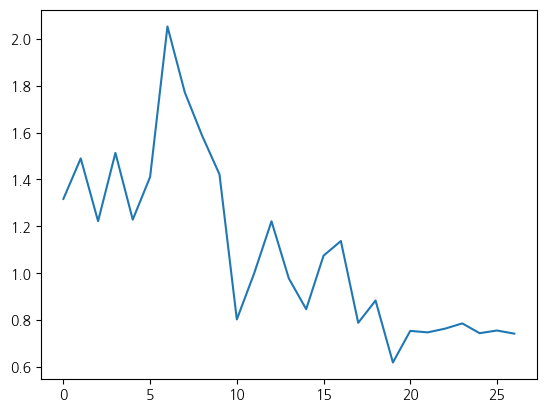

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 1 3]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       0.80      0.80      0.80         5
         카리나       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.84        20
weighted avg       0.85      0.85      0.84        20

Validation Loss: 0.7391 Acc: 85.0000%
Training complete in 6m 24s
Best Validation Accuracy: 85.0000


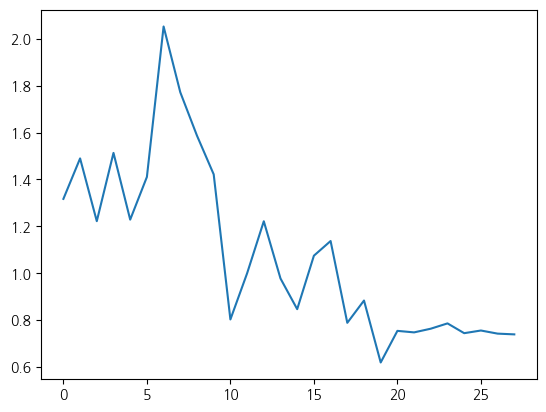

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 1 3]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       0.80      0.80      0.80         5
         카리나       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.84        20
weighted avg       0.85      0.85      0.84        20

Validation Loss: 0.7081 Acc: 85.0000%
Training complete in 6m 38s
Best Validation Accuracy: 85.0000


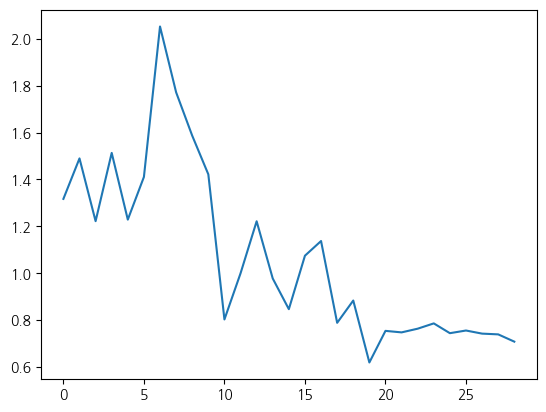

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 1 3]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       0.80      0.80      0.80         5
         카리나       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.84        20
weighted avg       0.85      0.85      0.84        20

Validation Loss: 0.7389 Acc: 85.0000%
Training complete in 6m 52s
Best Validation Accuracy: 85.0000


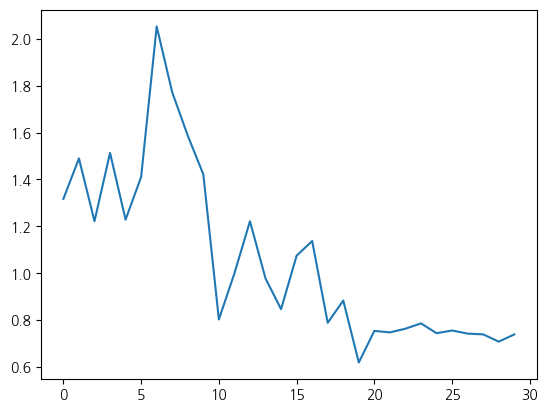

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7646 Acc: 90.0000%
Training complete in 7m 6s
Best Validation Accuracy: 90.0000


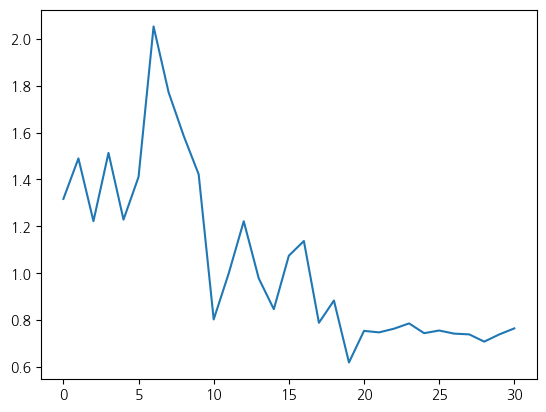

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7565 Acc: 90.0000%
Training complete in 7m 19s
Best Validation Accuracy: 90.0000


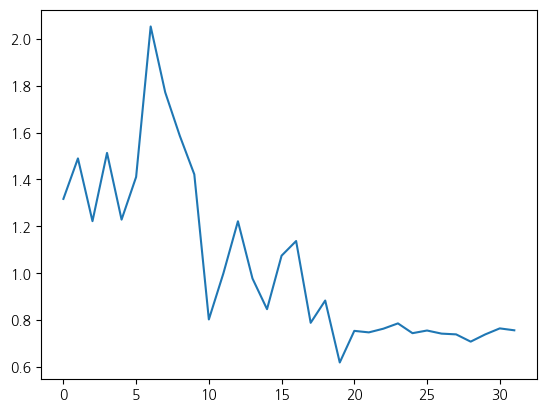

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7635 Acc: 90.0000%
Training complete in 7m 33s
Best Validation Accuracy: 90.0000


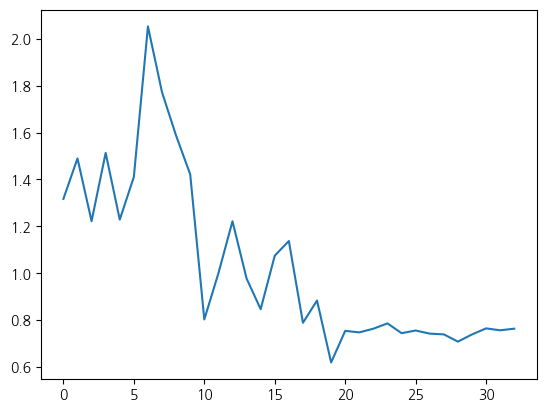

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7576 Acc: 90.0000%
Training complete in 7m 47s
Best Validation Accuracy: 90.0000


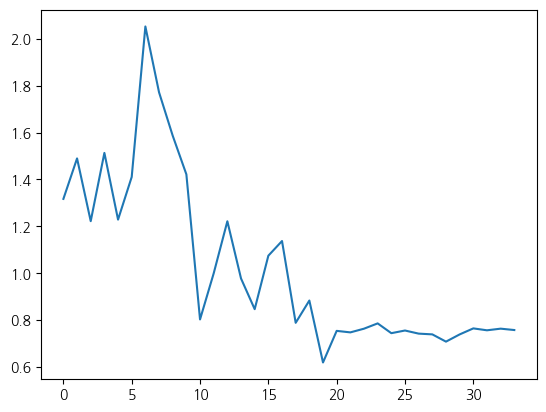

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7509 Acc: 90.0000%
Training complete in 8m 1s
Best Validation Accuracy: 90.0000


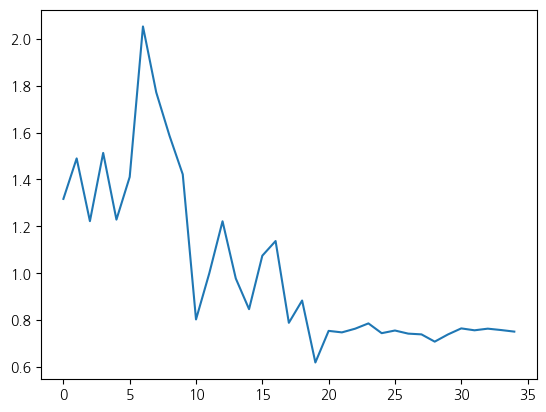

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7484 Acc: 90.0000%
Training complete in 8m 14s
Best Validation Accuracy: 90.0000


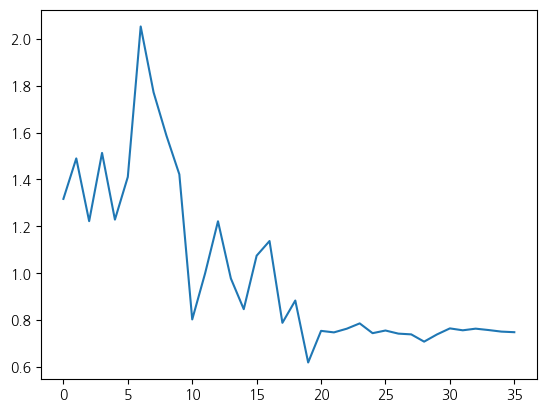

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7612 Acc: 90.0000%
Training complete in 8m 27s
Best Validation Accuracy: 90.0000


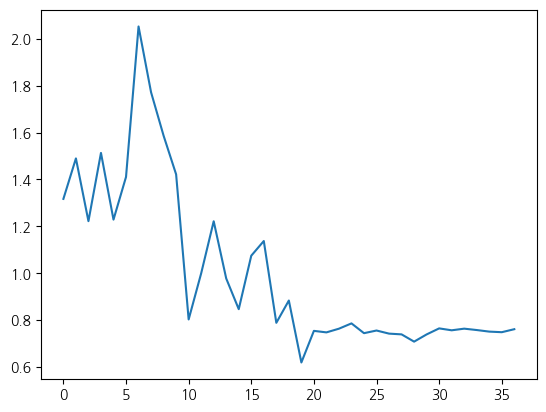

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7637 Acc: 90.0000%
Training complete in 8m 40s
Best Validation Accuracy: 90.0000


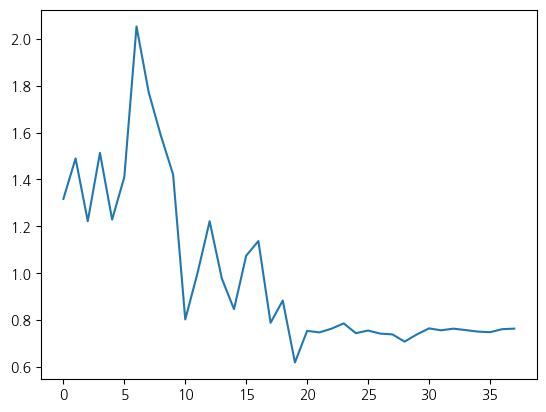

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7567 Acc: 90.0000%
Training complete in 8m 53s
Best Validation Accuracy: 90.0000


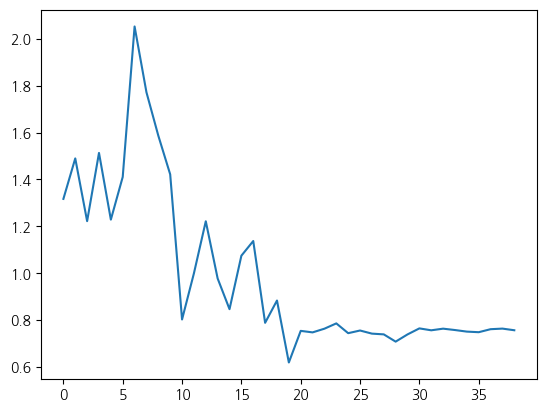

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7613 Acc: 90.0000%
Training complete in 9m 6s
Best Validation Accuracy: 90.0000


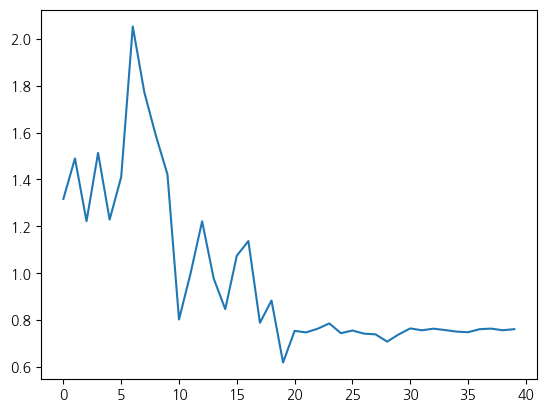

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7635 Acc: 90.0000%
Training complete in 9m 20s
Best Validation Accuracy: 90.0000


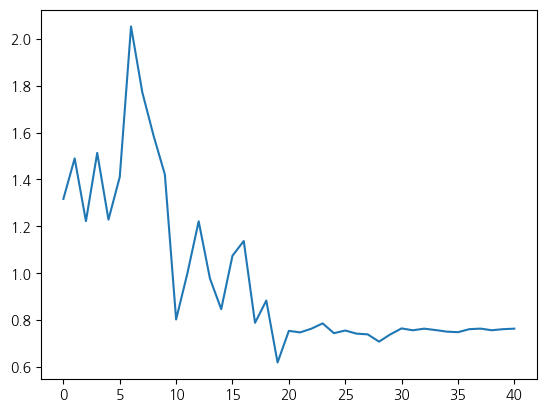

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7639 Acc: 90.0000%
Training complete in 9m 34s
Best Validation Accuracy: 90.0000


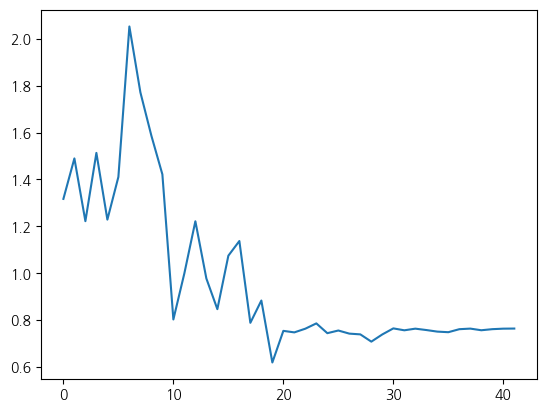

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7629 Acc: 90.0000%
Training complete in 9m 48s
Best Validation Accuracy: 90.0000


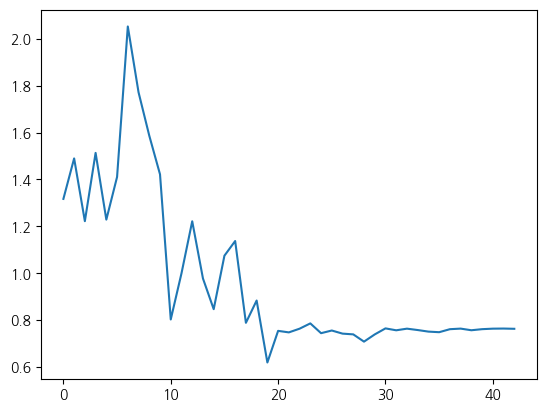

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7630 Acc: 90.0000%
Training complete in 10m 1s
Best Validation Accuracy: 90.0000


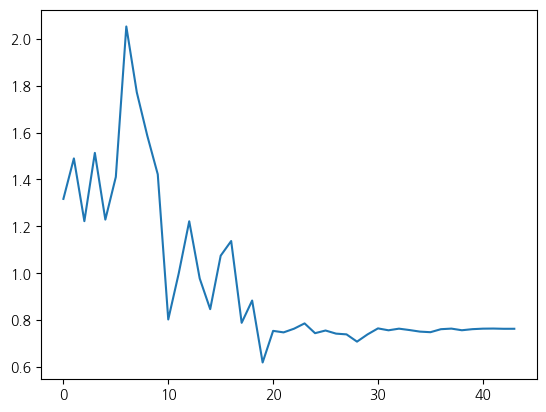

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7642 Acc: 90.0000%
Training complete in 10m 15s
Best Validation Accuracy: 90.0000


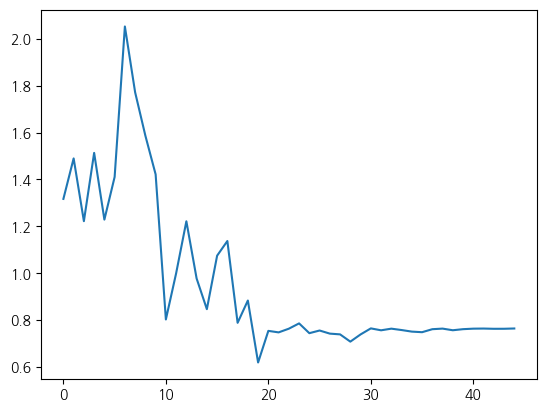

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7644 Acc: 90.0000%
Training complete in 10m 29s
Best Validation Accuracy: 90.0000


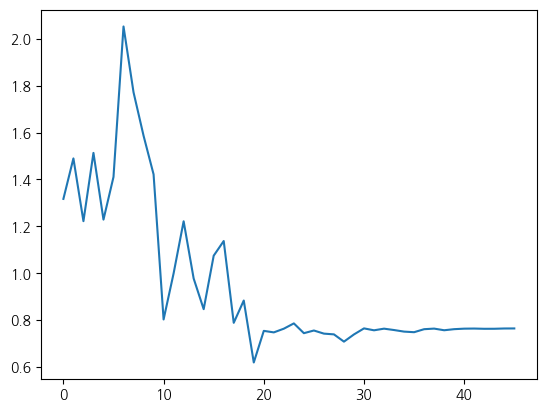

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7632 Acc: 90.0000%
Training complete in 10m 43s
Best Validation Accuracy: 90.0000


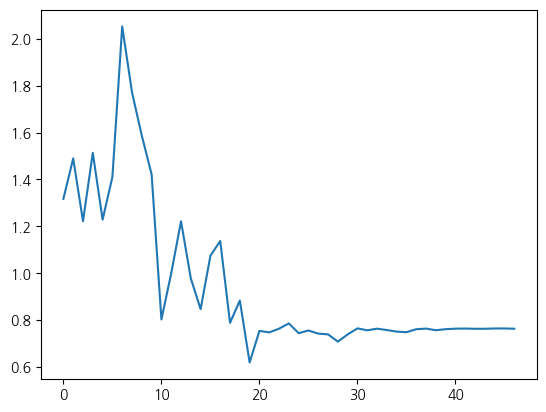

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7639 Acc: 90.0000%
Training complete in 10m 57s
Best Validation Accuracy: 90.0000


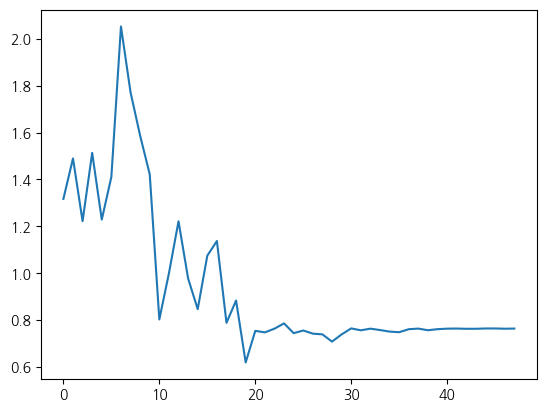

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7640 Acc: 90.0000%
Training complete in 11m 10s
Best Validation Accuracy: 90.0000


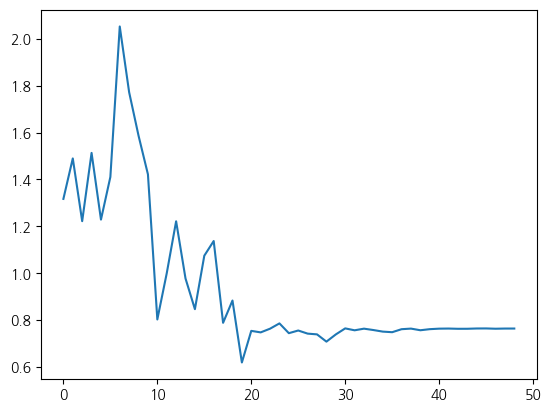

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 1 0 4]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      1.00      1.00         5
          윈터       0.83      1.00      0.91         5
          지젤       1.00      0.80      0.89         5
         카리나       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.91      0.90      0.90        20
weighted avg       0.91      0.90      0.90        20

Validation Loss: 0.7624 Acc: 90.0000%
Training complete in 11m 23s
Best Validation Accuracy: 90.0000


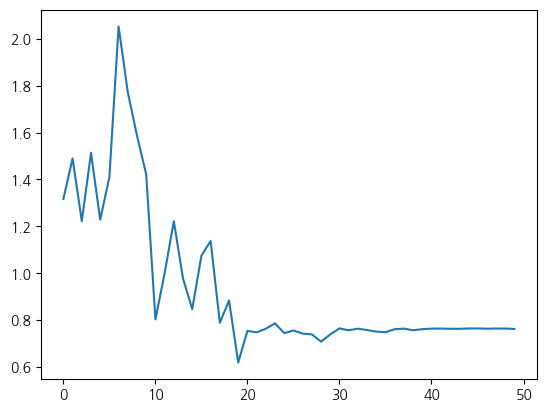

In [19]:
import copy
import time
num_epochs = 50
model.train()
start_time = time.time()
best_acc = -1
losslist = []
acclist = []

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)


    # 학습률 스케줄러 업데이트
    scheduler.step()

    # 학습 과정 중에 결과 출력


    # validation을 위한 함수 호출
    val_loss, val_acc = evaluate(model, criterion, val_dataloader, device)
    losslist.append(val_loss)
    acclist.append(val_acc)
    
    # validation 결과 출력
    print('Validation Loss: {:.4f} Acc: {:.4f}%'.format(val_loss, val_acc))

    # Best Model 저장
    if val_acc > best_acc:
        best_acc = val_acc
        best_model_wts = copy.deepcopy(model.state_dict())
    end = time.time()
    time_elapsed= end - start_time
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Validation Accuracy: {:.4f}'.format(best_acc))

    # Best Model 불러오기
    model.load_state_dict(best_model_wts)
    if epoch < 2:
      continue
    plt.plot(losslist)
    plt.show()

60.000003814697266


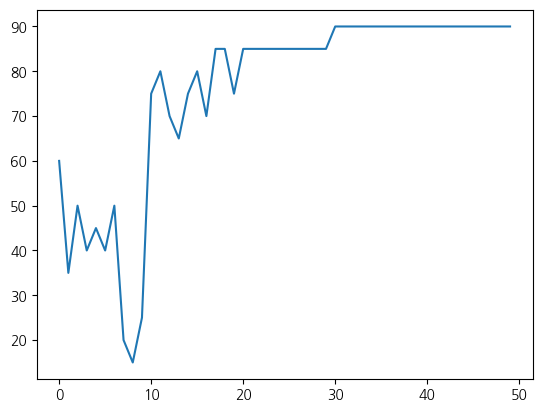

In [20]:
print(acclist[0].item())
result = []
for x in acclist:
  result.append(x.item())
plt.plot(result)
plt.show()

학습한 모델 평가

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[예측 결과: 닝닝] (실제 정답: 닝닝)


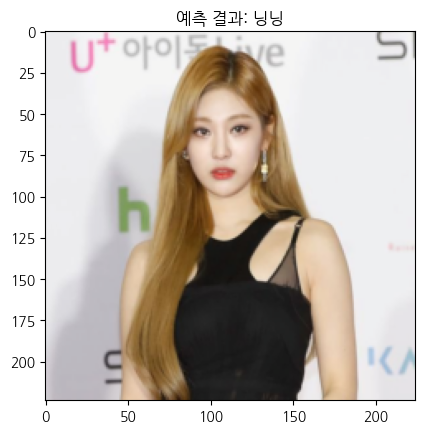

[예측 결과: 카리나] (실제 정답: 윈터)


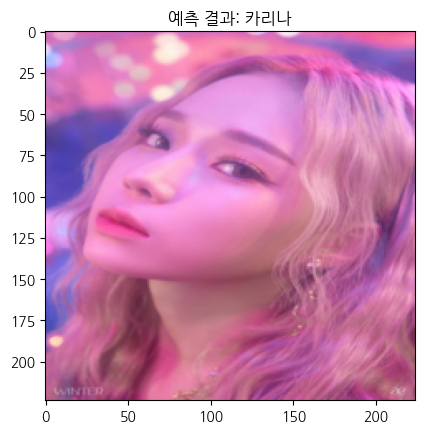

[예측 결과: 지젤] (실제 정답: 지젤)


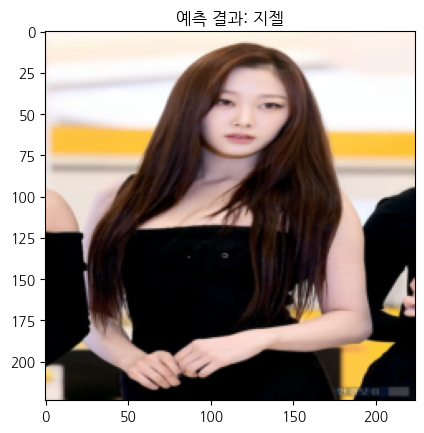

[예측 결과: 지젤] (실제 정답: 지젤)


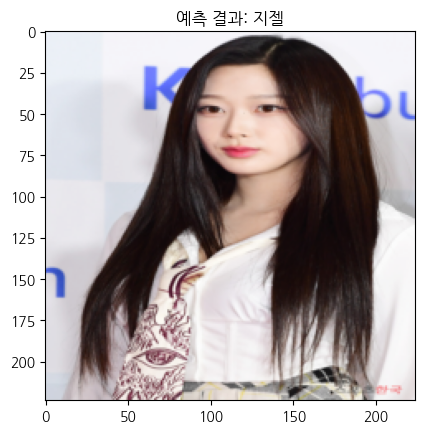

[예측 결과: 닝닝] (실제 정답: 닝닝)


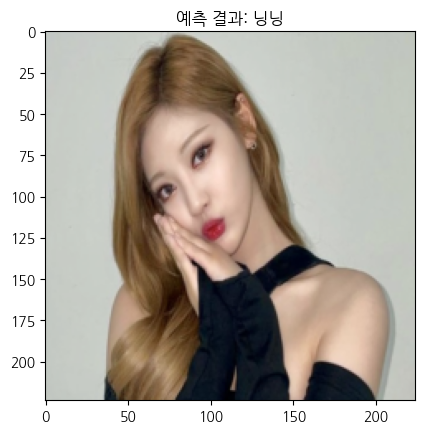

[Test Phase] Loss: 1.7916 Acc: 60.0000% Time: 2.4410s
(20, 60)


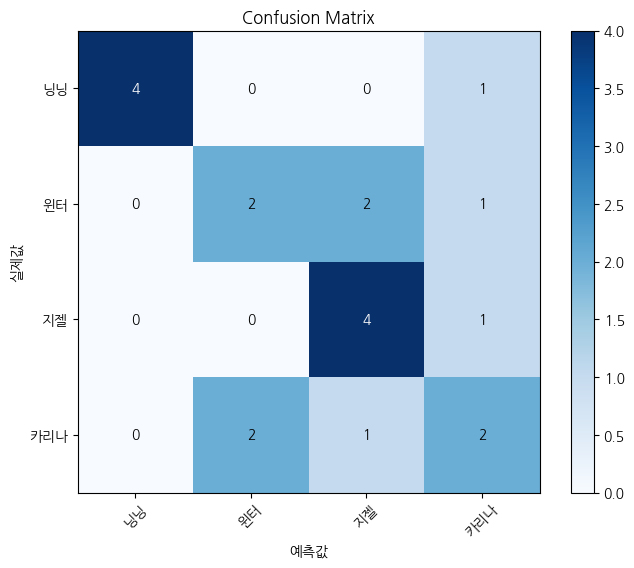

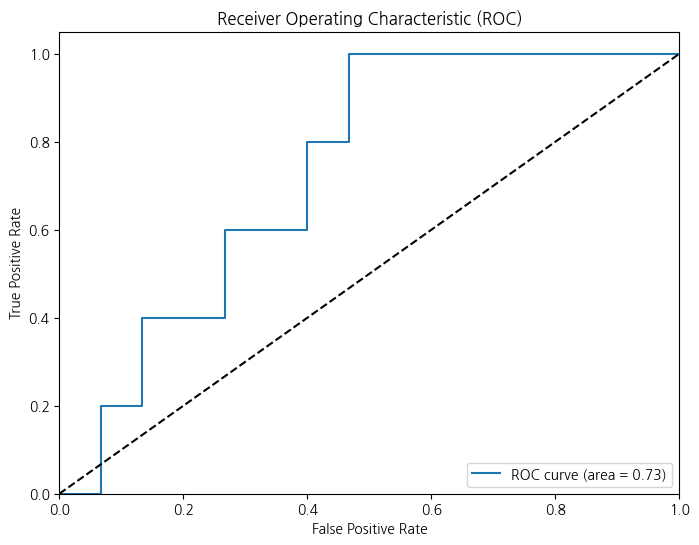

F1 스코어: 0.6000
Precision: 0.6179
Recall: 0.6000
Accuracy: 0.6000


In [21]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score

# ...

# 모델 평가
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0
    all_preds = []  # 예측 값들을 저장할 리스트
    all_labels = []  # 실제 레이블들을 저장할 리스트
    probs = []  # 확률값을 저장할 리스트

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        all_preds.extend(preds.cpu().numpy())  # 예측 값들을 리스트에 추가
        all_labels.extend(labels.data.cpu().numpy())  # 실제 레이블들을 리스트에 추가

        probs.extend(torch.nn.functional.softmax(outputs, dim=1).cpu().numpy())  # 확률값들을 리스트에 추가

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

    # `probs`와 `all_labels`의 길이를 확인하고 조정
    if len(probs) != len(all_labels):
        print("Error: Number of samples in `probs` and `all_labels` do not match.")
        exit()

    # `probs`의 shape 확인
    probs = np.array(probs)
    print(probs.shape)

# Confusion Matrix 계산
confusion = confusion_matrix(all_labels, all_preds)

# Precision 계산
precision = precision_score(all_labels, all_preds, average='macro')

# Recall 계산
recall = recall_score(all_labels, all_preds, average='macro')

# Accuracy 계산
accuracy = accuracy_score(all_labels, all_preds)

# Confusion Matrix 출력
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('예측값')
plt.ylabel('실제값')
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='white' if confusion[i, j] > np.max(confusion) / 2 else 'black')
plt.show()

# ROC Curve 계산 및 그리기
fpr, tpr, thresholds = roc_curve(all_labels, probs[:, 1], pos_label=1)  # ROC Curve 계산
roc_auc = auc(fpr, tpr)  # AUC 계산

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# F1 Score 계산
f1 = f1_score(all_labels, all_preds, average='macro')

print('F1 스코어: {:.4f}'.format(f1))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('Accuracy: {:.4f}'.format(accuracy))
